In [84]:
import pandas as pd
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

# Read tsv data

In [85]:
df = pd.read_csv('county_market_tracker .tsv000',delimiter='\t')


# Filter Data for Colorado

In [86]:
colorado = df[df['state'] == 'Colorado']


# Convert period_end column to datetime object

In [87]:
colorado['period_end'] = pd.to_datetime(colorado['period_end'])

# Sort Values Historically

In [5]:
colorado = colorado.sort_values(by='period_begin')

In [6]:
colorado = colorado.reset_index()


In [7]:
colorado

index period_begin period_end  period_duration region_type  \
0      411285   2012-01-01 2012-01-31               30      county   
1      130923   2012-01-01 2012-01-31               30      county   
2      323675   2012-01-01 2012-01-31               30      county   
3      325623   2012-01-01 2012-01-31               30      county   
4      327700   2012-01-01 2012-01-31               30      county   
...       ...          ...        ...              ...         ...   
19499  313454   2022-07-01 2022-07-31               30      county   
19500    2746   2022-07-01 2022-07-31               30      county   
19501  564843   2022-07-01 2022-07-31               30      county   
19502  288943   2022-07-01 2022-07-31               30      county   
19503   58555   2022-07-01 2022-07-31               30      county   

       region_type_id  table_id is_seasonally_adjusted                 region  \
0                   5       395                      f    La Plata County, CO   
1                   5       408                      f        Park County, CO   
2                   5       403                      f   Montezuma County, CO   
3                   5       377                      f      Denver County, CO   
4                   5       408                      f        Park County, CO   
...               ...       ...                    ...                    ...   
19499               5       390                      f     Jackson County, CO   
19500               5       414                      f  Rio Grande County, CO   
19501               5       367                      f     Boulder County, CO   
19502               5       367                      f     Boulder County, CO   
19503               5       423                      f        Weld County, CO   

       city     state state_code              property_type  property_type_id  \
0       NaN  Colorado         CO                Condo/Co-op                 3   
1       NaN  Colorado         CO            All Residential                -1   
2       NaN  Colorado         CO  Single Family Residential                 6   
3       NaN  Colorado         CO                Condo/Co-op                 3   
4       NaN  Colorado         CO  Single Family Residential                 6   
...     ...       ...        ...                        ...               ...   
19499   NaN  Colorado         CO  Single Family Residential                 6   
19500   NaN  Colorado         CO    Multi-Family (2-4 Unit)                 4   
19501   NaN  Colorado         CO    Multi-Family (2-4 Unit)                 4   
19502   NaN  Colorado         CO  Single Family Residential                 6   
19503   NaN  Colorado         CO                  Townhouse                13   

       median_sale_price  median_sale_price_mom  median_sale_price_yoy  \
0               185000.0              -0.227557              -0.281553   
1               247000.0               0.452941               0.565272   
2               123500.0               0.016453              -0.286127   
3               131500.0               0.000000               0.043651   
4               247000.0               0.452941               0.565272   
...                  ...                    ...                    ...   
19499           302000.0               0.098182              -0.488136   
19500           326500.0                    NaN                    NaN   
19501           720000.0              -0.424000               0.190083   
19502           834400.0              -0.095501               0.113276   
19503           368000.0               0.030812               0.099065   

       median_list_price  median_list_price_mom  median_list_price_yoy  \
0               299900.0               0.003010              -0.098045   
1               239900.0               0.418687               0.066222   
2               160000.0               0.172161              -0.090651   
3               234900.0            

# Filter necessary columns for investigating features.

In [8]:
colorado = colorado[['period_end','region','property_type','median_sale_price','median_list_price','homes_sold','pending_sales',
'new_listings','months_of_supply','sold_above_list','price_drops','off_market_in_two_weeks']]

In [9]:
colorado

period_end                 region              property_type  \
0     2012-01-31    La Plata County, CO                Condo/Co-op   
1     2012-01-31        Park County, CO            All Residential   
2     2012-01-31   Montezuma County, CO  Single Family Residential   
3     2012-01-31      Denver County, CO                Condo/Co-op   
4     2012-01-31        Park County, CO  Single Family Residential   
...          ...                    ...                        ...   
19499 2022-07-31     Jackson County, CO  Single Family Residential   
19500 2022-07-31  Rio Grande County, CO    Multi-Family (2-4 Unit)   
19501 2022-07-31     Boulder County, CO    Multi-Family (2-4 Unit)   
19502 2022-07-31     Boulder County, CO  Single Family Residential   
19503 2022-07-31        Weld County, CO                  Townhouse   

       median_sale_price  median_list_price  homes_sold  pending_sales  \
0               185000.0           299900.0        11.0            2.0   
1               247000.0           239900.0        11.0            3.0   
2               123500.0           160000.0        10.0            3.0   
3               131500.0           234900.0       113.0           98.0   
4               247000.0           239900.0        11.0            3.0   
...                  ...                ...         ...            ...   
19499           302000.0           349950.0         2.0            3.0   
19500           326500.0                NaN         1.0            1.0   
19501           720000.0           716500.0         3.0            4.0   
19502           834400.0           716500.0       282.0          295.0   
19503           368000.0           490000.0        43.0           40.0   

       new_listings  months_of_supply  sold_above_list  price_drops  \
0              10.0              11.5         0.090909          NaN   
1              32.0              27.5         0.000000          NaN   
2              24.0              21.2         0.100000          NaN   
3             200.0               5.5         0.097345     0.170418   
4              31.0              26.8         0.000000          NaN   
...             ...               ...              ...          ...   
19499           2.0               1.0         0.000000          NaN   
19500           NaN               NaN         1.000000          NaN   
19501           8.0               4.7         0.333333     0.214286   
19502         387.0               2.8         0.354610     0.357506   
19503          53.0               2.4         0.325581     0.242718   

       off_market_in_two_weeks  
0                     0.000000  
1                     0.000000  
2                     0.000000  
3                     0.469388  
4                     0.000000  
...                        ...  
19499                 0.333333  
19500                 0.000000  
19501                 0.500000  
19502                 0.227119  
19503                 0.375000  

[19504 rows x 12 columns]

In [10]:
Denver = colorado[colorado['region'] == 'Denver County, CO'] 

In [11]:
Denver.set_index('period_end',inplace=True)

In [12]:
Denver = Denver[Denver['property_type'] == 'All Residential']

<AxesSubplot:xlabel='period_end'>

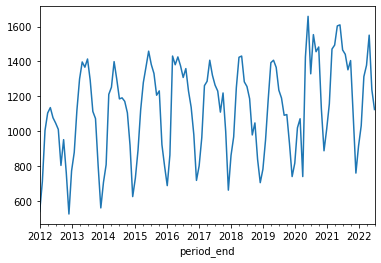

In [13]:
Denver['pending_sales'].plot()

In [14]:
Single_Family_Residential = Denver[Denver['property_type'] == 'Single Family Residential'] 

In [15]:
Single_Family_Residential

Empty DataFrame
Columns: [region, property_type, median_sale_price, median_list_price, homes_sold, pending_sales, new_listings, months_of_supply, sold_above_list, price_drops, off_market_in_two_weeks]
Index: []

In [16]:
Condo_Co_op = Denver[Denver['property_type'] == 'Condo/Co-op']

In [17]:
Condo_Co_op

Empty DataFrame
Columns: [region, property_type, median_sale_price, median_list_price, homes_sold, pending_sales, new_listings, months_of_supply, sold_above_list, price_drops, off_market_in_two_weeks]
Index: []

In [18]:
Multi_Family = Denver[Denver['property_type'] == 'Multi-Family (2-4 Unit)']

In [19]:
Townhouse = Denver[Denver['property_type'] == 'Townhouse']

In [20]:
Townhouse.head()

Empty DataFrame
Columns: [region, property_type, median_sale_price, median_list_price, homes_sold, pending_sales, new_listings, months_of_supply, sold_above_list, price_drops, off_market_in_two_weeks]
Index: []

In [21]:
Denver

region    property_type  median_sale_price  \
period_end                                                          
2012-01-31  Denver County, CO  All Residential           195000.0   
2012-02-29  Denver County, CO  All Residential           196250.0   
2012-03-31  Denver County, CO  All Residential           224950.0   
2012-04-30  Denver County, CO  All Residential           240000.0   
2012-05-31  Denver County, CO  All Residential           249900.0   
...                       ...              ...                ...   
2022-03-31  Denver County, CO  All Residential           597000.0   
2022-04-30  Denver County, CO  All Residential           645000.0   
2022-05-31  Denver County, CO  All Residential           612000.0   
2022-06-30  Denver County, CO  All Residential           621250.0   
2022-07-31  Denver County, CO  All Residential           585000.0   

            median_list_price  homes_sold  pending_sales  new_listings  \
period_end                                                               
2012-01-31           234900.0       577.0          538.0         957.0   
2012-02-29           254900.0       628.0          710.0        1074.0   
2012-03-31           259900.0       894.0         1004.0        1421.0   
2012-04-30           255000.0      1038.0         1104.0        1356.0   
2012-05-31           259000.0      1260.0         1135.0        1430.0   
...                       ...         ...            ...           ...   
2022-03-31           614900.0      1256.0         1313.0        1542.0   
2022-04-30           600000.0      1374.0         1378.0        1637.0   
2022-05-31           599998.5      1470.0         1551.0        1616.0   
2022-06-30           599999.0      1359.0         1238.0        1725.0   
2022-07-31           565000.0      1063.0         1124.0        1400.0   

            months_of_supply  sold_above_list  price_drops  \
period_end                                                   
2012-01-31               4.2         0.159445     0.176962   
2012-02-29               3.8         0.184713     0.143035   
2012-03-31               2.8         0.184564     0.154501   
2012-04-30               2.3         0.183044     0.165846   
2012-05-31               1.9         0.194444     0.173611   
...                      ...              ...          ...   
2022-03-31               0.5         0.724522     0.185129   
2022-04-30               0.6         0.745997     0.233184   
2022-05-31               0.6         0.681633     0.379198   
2022-06-30               1.0         0.592347     0.480576   
2022-07-31               1.5         0.415804     0.519481   

            off_market_in_two_weeks  
period_end                           
2012-01-31                 0.420074  
2012-02-29                 0.471831  
2012-03-31                 0.503984  
2012-04-30                 0.514493  
2012-05-31                 0.498678  
...                             ...  
2022-03-31                 0.862148  
2022-04-30                 0.865022  
2022-05-31                 0.809155  
2022-06-30                 0.682553  
2022-07-31                 0.540036  

[127 rows x 11 columns]

In [22]:
Denver = Denver[Denver['property_type'] == 'All Residential']

In [23]:
Denver

region    property_type  median_sale_price  \
period_end                                                          
2012-01-31  Denver County, CO  All Residential           195000.0   
2012-02-29  Denver County, CO  All Residential           196250.0   
2012-03-31  Denver County, CO  All Residential           224950.0   
2012-04-30  Denver County, CO  All Residential           240000.0   
2012-05-31  Denver County, CO  All Residential           249900.0   
...                       ...              ...                ...   
2022-03-31  Denver County, CO  All Residential           597000.0   
2022-04-30  Denver County, CO  All Residential           645000.0   
2022-05-31  Denver County, CO  All Residential           612000.0   
2022-06-30  Denver County, CO  All Residential           621250.0   
2022-07-31  Denver County, CO  All Residential           585000.0   

            median_list_price  homes_sold  pending_sales  new_listings  \
period_end                                                               
2012-01-31           234900.0       577.0          538.0         957.0   
2012-02-29           254900.0       628.0          710.0        1074.0   
2012-03-31           259900.0       894.0         1004.0        1421.0   
2012-04-30           255000.0      1038.0         1104.0        1356.0   
2012-05-31           259000.0      1260.0         1135.0        1430.0   
...                       ...         ...            ...           ...   
2022-03-31           614900.0      1256.0         1313.0        1542.0   
2022-04-30           600000.0      1374.0         1378.0        1637.0   
2022-05-31           599998.5      1470.0         1551.0        1616.0   
2022-06-30           599999.0      1359.0         1238.0        1725.0   
2022-07-31           565000.0      1063.0         1124.0        1400.0   

            months_of_supply  sold_above_list  price_drops  \
period_end                                                   
2012-01-31               4.2         0.159445     0.176962   
2012-02-29               3.8         0.184713     0.143035   
2012-03-31               2.8         0.184564     0.154501   
2012-04-30               2.3         0.183044     0.165846   
2012-05-31               1.9         0.194444     0.173611   
...                      ...              ...          ...   
2022-03-31               0.5         0.724522     0.185129   
2022-04-30               0.6         0.745997     0.233184   
2022-05-31               0.6         0.681633     0.379198   
2022-06-30               1.0         0.592347     0.480576   
2022-07-31               1.5         0.415804     0.519481   

            off_market_in_two_weeks  
period_end                           
2012-01-31                 0.420074  
2012-02-29                 0.471831  
2012-03-31                 0.503984  
2012-04-30                 0.514493  
2012-05-31                 0.498678  
...                             ...  
2022-03-31                 0.862148  
2022-04-30                 0.865022  
2022-05-31                 0.809155  
2022-06-30                 0.682553  
2022-07-31                 0.540036  

[127 rows x 11 columns]

In [24]:
Denver['homes_sold'].plot(backend="plotly")

# With the regions between the line charts, we can observe the price differences between sales and listings. In addition, thanks to the bars below, we can understand how much this difference is according to time.

In [ ]:
import plotly.graph_objects as go
import plotly.graph_objects as go
from plotly.subplots import make_subplots


fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=Denver.index,
        y=Denver["median_list_price"],
        name="Median List Price",  # this sets its legend entry
        line=dict(color="black", width=2),
        # fill="tozeroy",
    )
)


fig.add_trace(
    go.Scatter(
        x=Denver.index,
        y=Denver["median_sale_price"],
        name="Median Sale Price",
        line=dict(color="red", width=2),
        fill="tonexty",
    )
)


fig.add_trace(
    go.Bar(
        x=Denver.index,
        y=Denver["median_sale_price"] - Denver["median_list_price"],
        name="Difference",
    )
)


fig.update_layout(
    xaxis_title="Date",
    legend_title="Traces",
    font=dict(family="Arial", size=15, color="black",),
)


fig.update_layout(
    title={
        "text": " Median List Price - Median Sale Price ($) ",
        "y": 0.92,
        "x": 0.47,
        "xanchor": "center",
        "yanchor": "top",
    },
    template="simple_white",
)


fig.update_xaxes(
    showline=True,
    # linecolor="red",
    linewidth=2,
    title_text="<b></b> Date (Year)",
)


fig.update_yaxes(
    showline=True,
    # linecolor="red",
    linewidth=2,
    title_text="<b>Denver House Price Index ($)</b>",
)


fig.show()

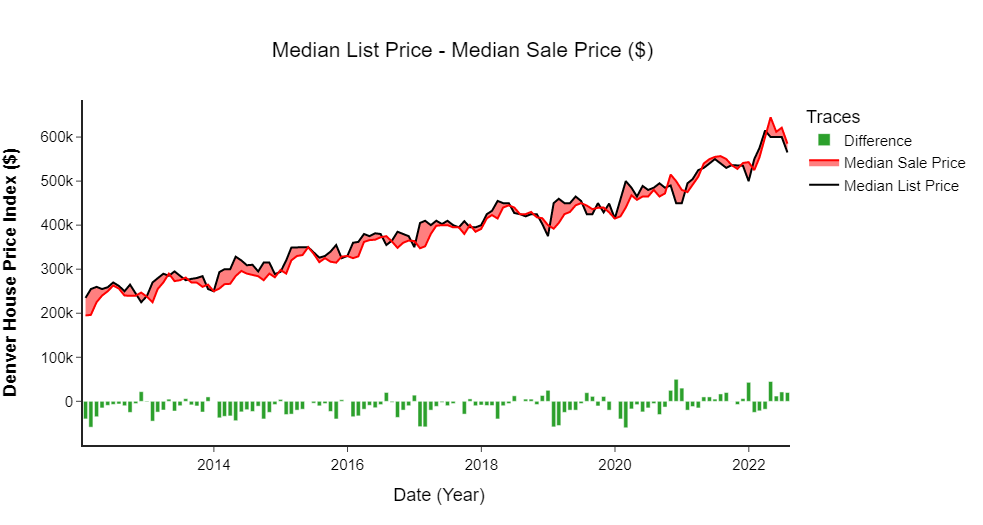

# Correlations 

<AxesSubplot:>

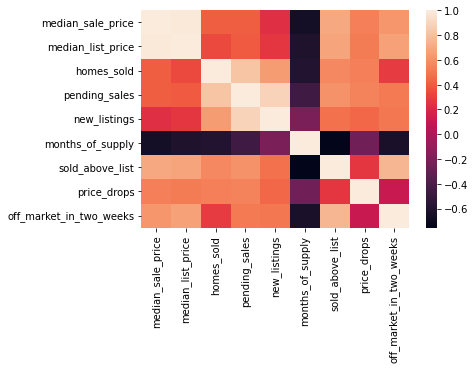

In [26]:
import seaborn as sns

corr= Denver.corr()
sns.heatmap(corr)

# months_of_supply

<AxesSubplot:xlabel='period_end'>

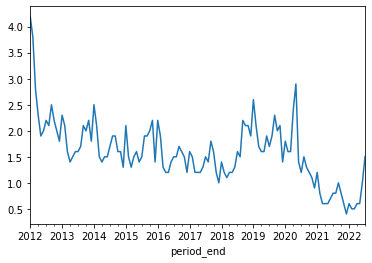

In [32]:
Denver['months_of_supply'].plot()

# off_market_in_two_weeks

<AxesSubplot:xlabel='period_end'>

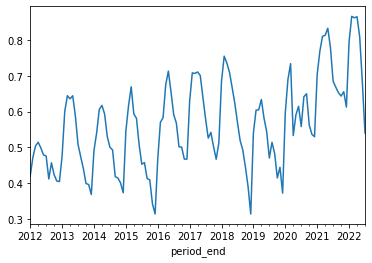

In [33]:
Denver['off_market_in_two_weeks'].plot()

# We can see median list price, sale price and their affects on off_market_in_two_weeks feature

In [ ]:
import plotly.graph_objects as go
import plotly.graph_objects as go
from plotly.subplots import make_subplots


fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(
        x=Denver.index,
        y=Denver["median_list_price"],
        name="median_list_price",  # this sets its legend entry
        line=dict(color="black", width=2),
        # fill="tozeroy",
    ),
    secondary_y=False,
)


fig.add_trace(
    go.Scatter(
        x=Denver.index,
        y=Denver["median_sale_price"],
        name="median_sale_price",  # this sets its legend entry
        line=dict(color="blue", width=2),
        # fill="tozeroy",
    ),
    secondary_y=False,
)


fig.add_trace(
    go.Scatter(
        x=Denver.index,
        y=Denver["off_market_in_two_weeks"],
        name="off_market_in_two_weeks",
        line=dict(color="red", width=2),
        # fill='tonexty'
    ),
    secondary_y=True,
)


fig.update_layout(
    xaxis_title="Date",
    legend_title="Traces",
    font=dict(family="Arial", size=15, color="Black",),
)


fig.update_layout(
    title={
        "text": " Median List-Sale Price - Off Market in Two Weeks ",
        "y": 0.92,
        "x": 0.45,
        "xanchor": "center",
        "yanchor": "top",
    },
    template="simple_white",
)


fig.update_xaxes(
    showline=True,
    # linecolor="red",
    linewidth=2,
    title_text="<b></b> Date (Year)",
)


fig.update_yaxes(
    showline=True,
    # linecolor="red",
    linewidth=2,
    title_text="<b>Price</b>",
)


fig.update_yaxes(title="Off Market in Two Weeks", secondary_y=True)

fig.update_layout(legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01))


# fig.show(renderer="png", width=300, height=560)
fig.show()

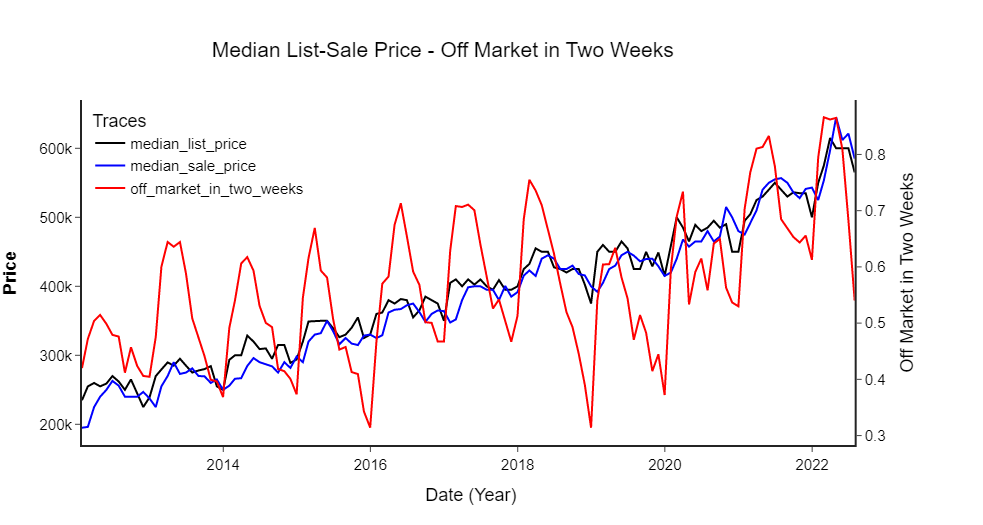

# Thanks to this chart, as expected, the fact that the sales price of the house supply is above the list price does not seem to have affected much.

In [ ]:
import plotly.graph_objects as go
import plotly.graph_objects as go
from plotly.subplots import make_subplots


fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(
        x=Denver.index,
        y=Denver["months_of_supply"],
        name="months_of_supply",  # this sets its legend entry
        line=dict(color="black", width=2),
        # fill="tozeroy",
    ),
    secondary_y=False,
)


fig.add_trace(
    go.Scatter(
        x=Denver.index,
        y=Denver["sold_above_list"],
        name="sold_above_list",
        line=dict(color="red", width=2),
        # fill='tonexty'
    ),
    secondary_y=True,
)


fig.update_layout(
    xaxis_title="Date",
    legend_title="Traces",
    font=dict(family="Arial", size=15, color="black",),
)


fig.update_layout(
    title={
        "text": " Months of Supply  - Sold Above List) ",
        "y": 0.92,
        "x": 0.47,
        "xanchor": "center",
        "yanchor": "top",
    },
    template="simple_white",
)


fig.update_xaxes(
    showline=True,
    # linecolor="red",
    linewidth=2,
    title_text="<b></b> Date (Year)",
)


fig.update_yaxes(
    showline=True,
    # linecolor="red",
    linewidth=2,
    title_text="<b>Denver House Price Index ($)</b>",
)


fig.update_yaxes(title_text="<b></b>Colorado House Price Index ($)", secondary_y=True)
fig.update_layout(legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01))


fig.show()

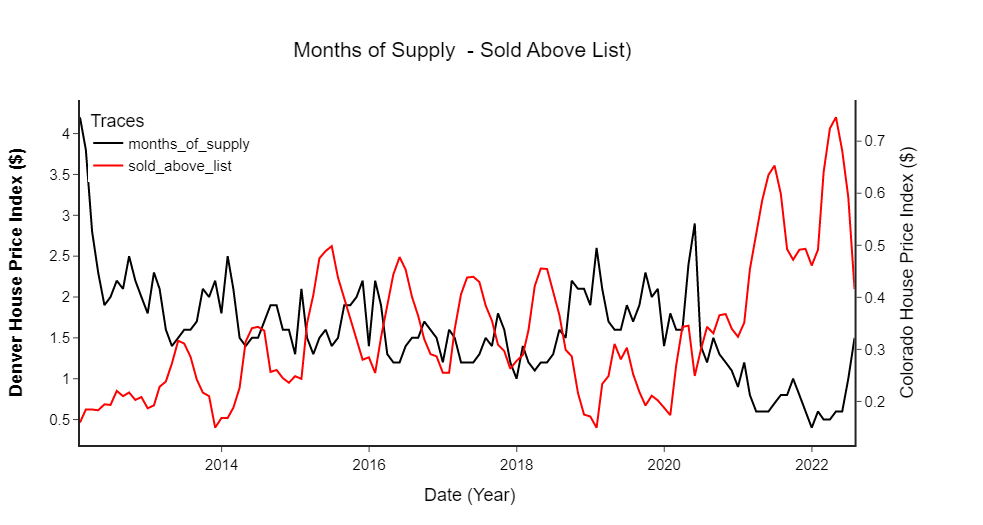

# We can see that homes_sold and pending sales features are high correlated.

In [ ]:
import plotly.graph_objects as go
import plotly.graph_objects as go
from plotly.subplots import make_subplots


fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(
        x=Denver.index,
        y=Denver["homes_sold"],
        name="homes_sold",  # this sets its legend entry
        line=dict(color="black", width=2),
        # fill="tonexty",
    ),
    secondary_y=False,
)


fig.add_trace(
    go.Scatter(
        x=Denver.index,
        y=Denver["pending_sales"],
        name="pending_sales",
        line=dict(color="red", width=2),
        # fill='tonexty'
    ),
    secondary_y=True,
)


fig.update_layout(
    xaxis_title="Date",
    legend_title="Traces",
    font=dict(family="Arial", size=15, color="black",),
)


fig.update_layout(
    title={
        "text": " Median List Price - Median Sale Price ($) ",
        "y": 0.92,
        "x": 0.47,
        "xanchor": "center",
        "yanchor": "top",
    },
    template="simple_white",
)


fig.update_xaxes(
    showline=True,
    # linecolor="red",
    linewidth=2,
    title_text="<b></b> Date (Year)",
)


fig.update_yaxes(
    showline=True,
    # linecolor="red",
    linewidth=2,
    title_text="<b>Denver House Price Index ($)</b>",
)


fig.update_yaxes(title_text="<b></b>Colorado House Price Index ($)", secondary_y=True)

fig.update_layout(legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01))


fig.show()

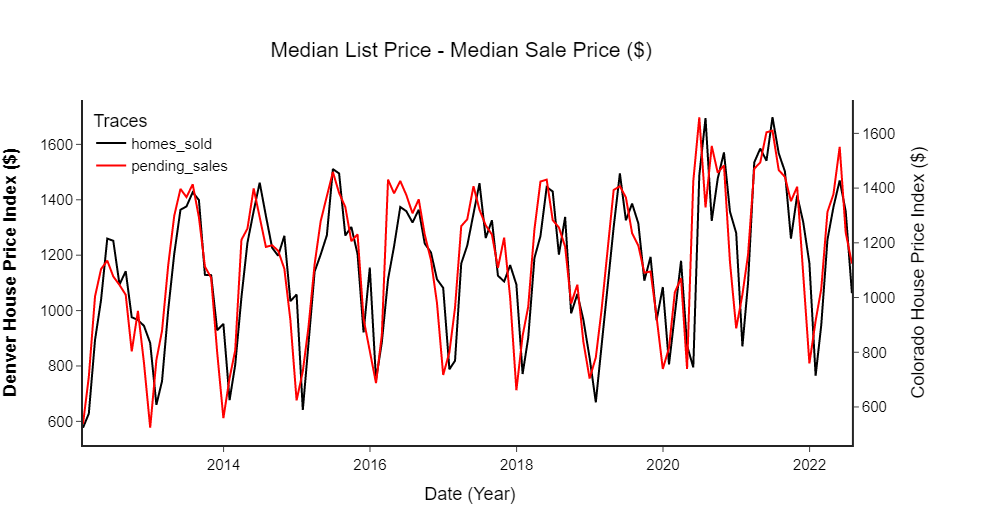

In [ ]:
import seaborn as sns
import numpy as np

Denver_corr = Denver.corr()
import plotly.figure_factory as ff

x = list(Denver_corr.columns)
y = list(Denver_corr.index)
z = np.array(Denver_corr)

fig = ff.create_annotated_heatmap(
    z,
    x=x,
    y=y,
    annotation_text=np.around(z, decimals=2),
    hoverinfo="z",
    colorscale="temps",
    showscale=True,
)
fig.show()

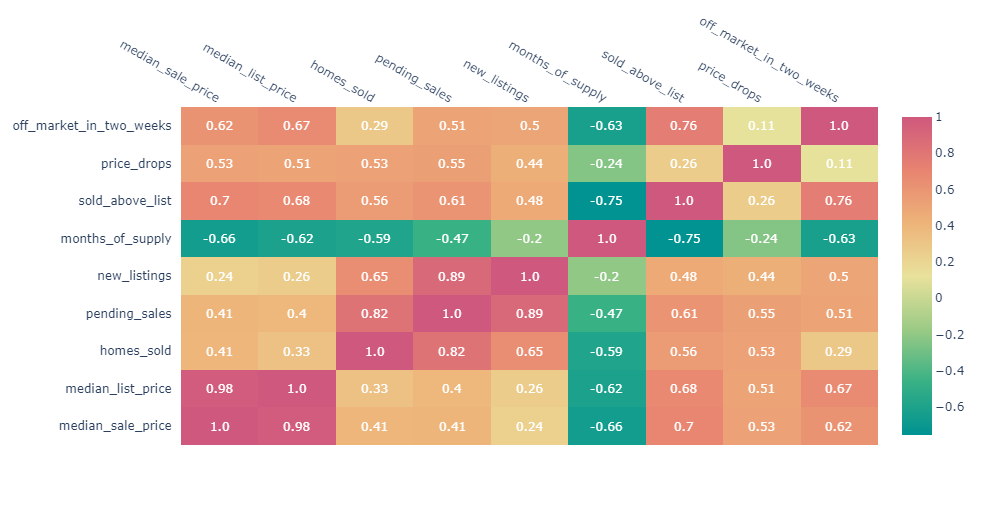

<AxesSubplot:xlabel='period_end'>

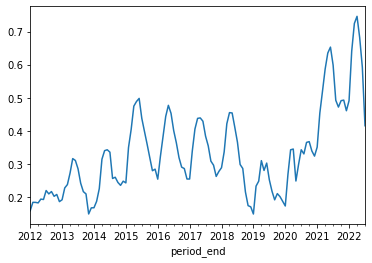

In [30]:
Denver['sold_above_list'].plot()

<AxesSubplot:xlabel='period_end'>

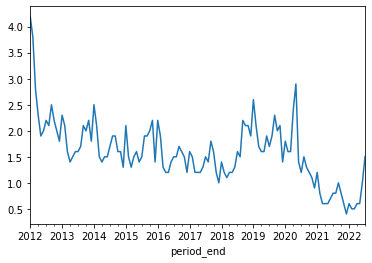

In [31]:
Denver['months_of_supply'].plot()

<AxesSubplot:xlabel='period_end'>

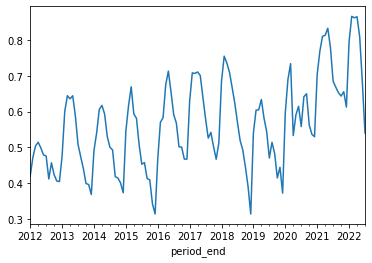

In [32]:
Denver['off_market_in_two_weeks'].plot()

# You can see that when a lot of houses are sold in a short period of time, that is, when the orange chart peaks, the black graph also peaks. In other words, as the sales frequency increases, the house prices tend to rise as the supply cannot meet the demand.

In [ ]:
import plotly.graph_objects as go
import plotly.graph_objects as go
from plotly.subplots import make_subplots


fig = make_subplots(specs=[[{"secondary_y": True}]])


fig.add_trace(
    go.Scatter(
        x=Denver.index,
        y=Denver["median_sale_price"],
        name="Median List Price",  # this sets its legend entry
        line=dict(color="black", width=3),
        # fill="tozeroy",
    ),
    secondary_y=False,
)


fig.add_trace(
    go.Scatter(x=Denver.index, y=Denver["homes_sold"], name="homes sold",),
    secondary_y=True,
)

fig.update_layout(
    xaxis_title="Date",
    legend_title="Traces",
    font=dict(family="Droid Serif", size=15, color="black",),
)


fig.update_layout(
    title={
        "text": " Median List Price - Homes Sold ",
        "y": 0.92,
        "x": 0.47,
        "xanchor": "center",
        "yanchor": "top",
    },
    template="simple_white",
)


fig.update_xaxes(
    showline=True,
    # linecolor="red",
    linewidth=2,
    title_text="<b></b> Date (Year)",
)

fig.update_yaxes(
    showline=True,
    # linecolor="red",
    linewidth=2,
    title_text="<b>Denver Median List Price ($)</b>",
)


fig.update_yaxes(
    visible=False,
    range=[700, 4000],
    title_text="<b></b>Colorado House Price Index ($)",
    secondary_y=True,
)


fig.show()

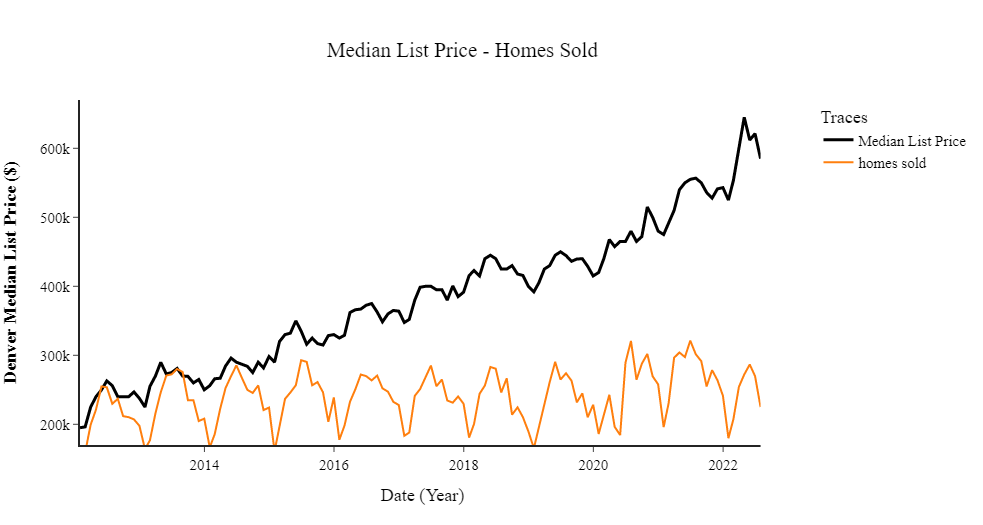

In [ ]:
import plotly.graph_objects as go
import plotly.graph_objects as go
from plotly.subplots import make_subplots


fig = make_subplots(specs=[[{"secondary_y": True}]])


fig.add_trace(
    go.Scatter(
        x=Denver.index,
        y=Denver["months_of_supply"],
        name="months_of_supply",  # this sets its legend entry
        line=dict(color="black", width=2),
        # fill="tozeroy",
    ),
    secondary_y=False,
)


fig.add_trace(
    go.Scatter(
        x=Denver.index,
        y=Denver["sold_above_list"],
        name="sold_above_list",
        line=dict(color="red", width=2),
        # fill='tonexty'
    ),
    secondary_y=True,
)


fig.update_layout(
    xaxis_title="Date",
    legend_title="Traces",
    font=dict(family="Arial", size=15, color="black",),
)


fig.update_layout(
    title={
        "text": " Months of Supply  - Sold Above List  ",
        "y": 0.92,
        "x": 0.45,
        "xanchor": "center",
        "yanchor": "top",
    },
    template="simple_white",
)


fig.update_xaxes(
    showline=True,
    # linecolor="red",
    linewidth=2,
    title_text="<b></b> Date (Year)",
)


fig.update_yaxes(
    showline=True,
    # linecolor="red",
    linewidth=2,
    title_text="<b>Denver House Price Index ($)</b>",
)


fig.update_yaxes(title_text="<b></b>Sold Above List", secondary_y=True)


fig.update_yaxes(title_text="<b></b>C Months of Supply", secondary_y=False)


fig.show()

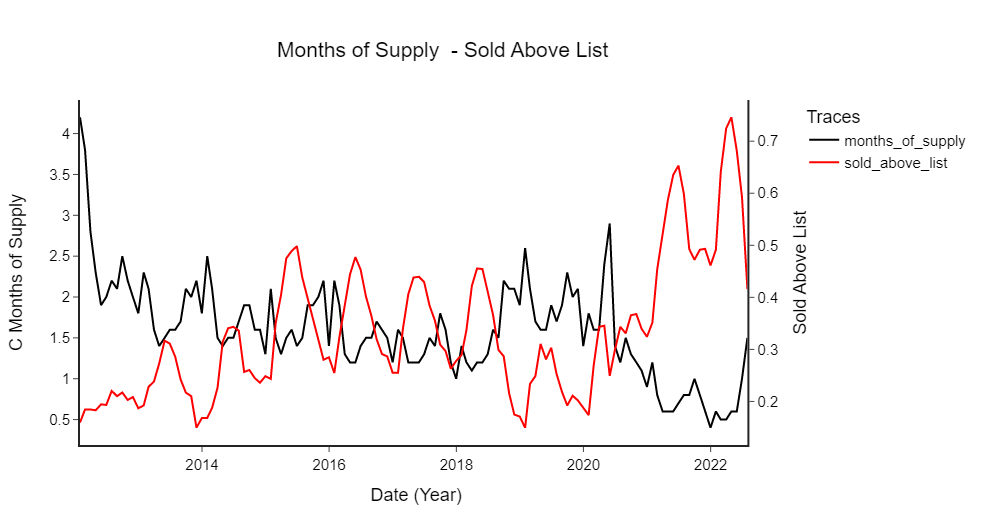

In [45]:
Denver['diff'] = Denver['median_sale_price'] - Denver['median_list_price']

# With that we can understand most of the time the houses sold under list price

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(x=Denver.index, y=Denver["diff"], name="diff"))


fig.update_xaxes(
    linewidth=1, title_text="<b></b> Date (Year)",
)

fig.update_layout(
    title={
        "text": " Difference Between Sale and List Price ($) ",
        "y": 0.92,
        "x": 0.47,
        "xanchor": "center",
        "yanchor": "top",
    },
    template="simple_white",
)

fig.update_yaxes(title_text="<b></b> Difference ($)")


fig.show()

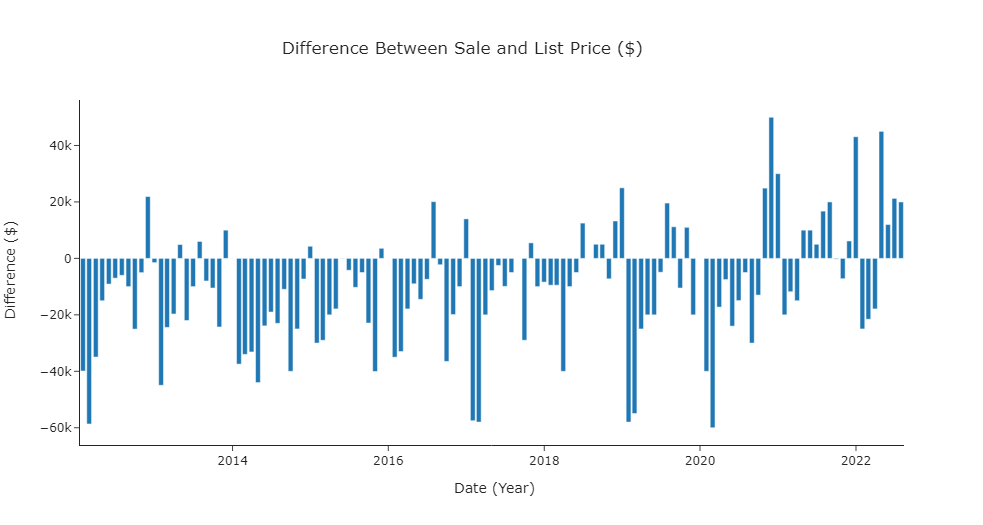

In [46]:
data = Denver[['median_sale_price']]

In [47]:
r90 = data.rolling(window='90D').mean().add_suffix("90_mean")

In [48]:
r100 = data.rolling(window='100D').mean().add_suffix("100_mean")

# 90 and 360 days moving average on median sale prices.


<AxesSubplot:xlabel='period_end'>

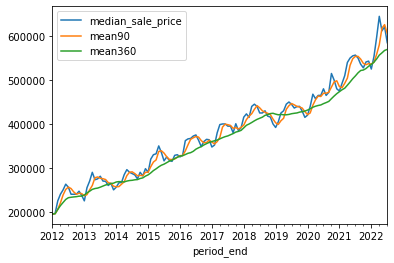

In [49]:
data["mean90"] = r90
r360 = data["median_sale_price"].rolling(window="360D").mean()
data["mean360"] = r360
data.plot()

# The standard deviation contained in the data.


array([<AxesSubplot:xlabel='period_end'>,
       <AxesSubplot:xlabel='period_end'>], dtype=object)

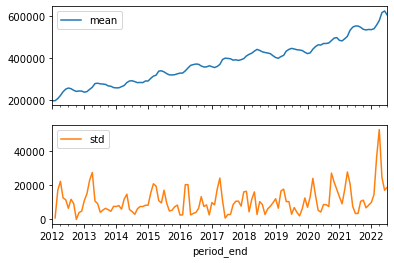

In [50]:
r = data.median_sale_price.rolling('90D').agg(['mean','std'])
r.plot(subplots=True)

# Choosing numerical features for being able to calculate percentage changes

In [51]:
dnv = Denver.iloc[:,2:]

In [62]:
dnv.head()

median_sale_price  median_list_price  homes_sold  pending_sales  \
period_end                                                                    
2012-01-31           195000.0           234900.0       577.0          538.0   
2012-02-29           196250.0           254900.0       628.0          710.0   
2012-03-31           224950.0           259900.0       894.0         1004.0   
2012-04-30           240000.0           255000.0      1038.0         1104.0   
2012-05-31           249900.0           259000.0      1260.0         1135.0   

            new_listings  months_of_supply  sold_above_list  price_drops  \
period_end                                                                 
2012-01-31         957.0               4.2         0.159445     0.176962   
2012-02-29        1074.0               3.8         0.184713     0.143035   
2012-03-31        1421.0               2.8         0.184564     0.154501   
2012-04-30        1356.0               2.3         0.183044     0.165846   
2012-05-31        1430.0               1.9         0.194444     0.173611   

            off_market_in_two_weeks     diff  
period_end                                    
2012-01-31                 0.420074 -39900.0  
2012-02-29                 0.471831 -58650.0  
2012-03-31                 0.503984 -34950.0  
2012-04-30                 0.514493 -15000.0  
2012-05-31                 0.498678  -9100.0

# Correlations between percentage change on every column

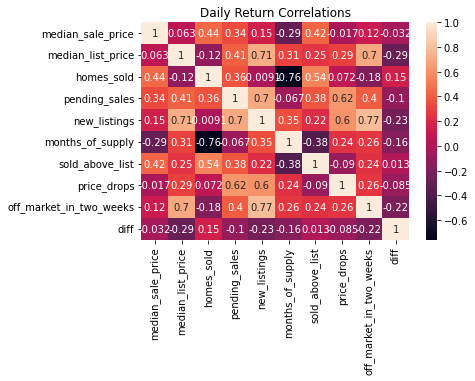

In [52]:
import matplotlib.pyplot as plt

# Calculate the daily returns
returns = dnv.pct_change()

# Calculate and print the pairwise correlations
correlations = returns.corr()

# Plot a heatmap of daily return correlations
sns.heatmap(correlations, annot=True)
plt.title("Daily Return Correlations")
plt.show()

# Correlation values ​​within the data created over the incremental differences of the columns within themselves.

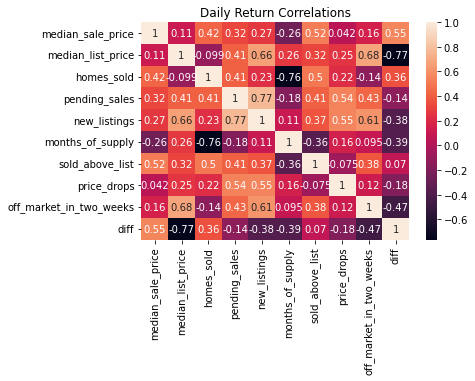

In [53]:
import matplotlib.pyplot as plt

# Calculate the daily returns
returns = dnv.diff()

# Calculate and print the pairwise correlations
correlations = returns.corr()
 

# Plot a heatmap of daily return correlations
sns.heatmap(correlations, annot=True)
plt.title('Daily Return Correlations')
plt.show()


In [54]:
Denver['months_of_supply_pct_change'] = Denver['months_of_supply'].pct_change()

# With that chart we can see percentage change on real estate supply 

<AxesSubplot:xlabel='period_end'>

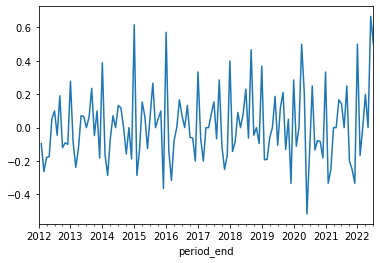

In [55]:
Denver['months_of_supply_pct_change'].plot()

# From here we can see new listing decrease when it comes to December

<AxesSubplot:xlabel='period_end'>

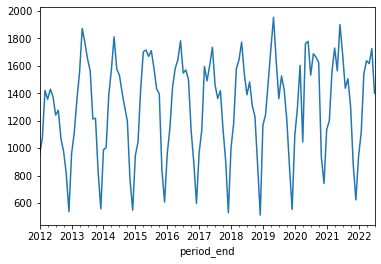

In [56]:
Denver['new_listings'].plot()

In [64]:
Denver_pct_change = dnv.pct_change()

<AxesSubplot:xlabel='period_end'>

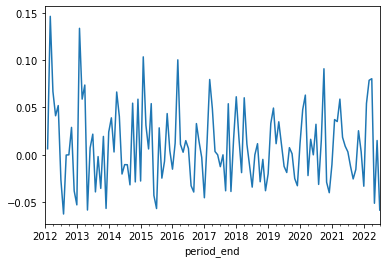

In [65]:
Denver_pct_change.median_sale_price.plot()

In [66]:
 Denver_pct_change= Denver_pct_change.iloc[1:,:]

In [67]:
Denver_pct_change

median_sale_price  median_list_price  homes_sold  pending_sales  \
period_end                                                                    
2012-02-29           0.006410       8.514261e-02    0.088388       0.319703   
2012-03-31           0.146242       1.961554e-02    0.423567       0.414085   
2012-04-30           0.066904      -1.885341e-02    0.161074       0.099602   
2012-05-31           0.041250       1.568627e-02    0.213873       0.028080   
2012-06-30           0.052021       4.208494e-02   -0.006349      -0.051101   
...                       ...                ...         ...            ...   
2022-03-31           0.078688       6.939130e-02    0.326294       0.273521   
2022-04-30           0.080402      -2.423158e-02    0.093949       0.049505   
2022-05-31          -0.051163      -2.500000e-06    0.069869       0.125544   
2022-06-30           0.015114       8.333354e-07   -0.075510      -0.201805   
2022-07-31          -0.058350      -5.833176e-02   -0.217807      -0.092084   

            new_listings  months_of_supply  sold_above_list  price_drops  \
period_end                                                                 
2012-02-29      0.122257         -0.095238         0.158474    -0.191718   
2012-03-31      0.323091         -0.263158        -0.000810     0.080165   
2012-04-30     -0.045742         -0.178571        -0.008233     0.073426   
2012-05-31      0.054572         -0.173913         0.062281     0.046823   
2012-06-30     -0.038462          0.052632        -0.005933     0.015658   
...                  ...               ...              ...          ...   
2022-03-31      0.384201          0.000000         0.130350    -0.091894   
2022-04-30      0.061608          0.200000         0.029640     0.259575   
2022-05-31     -0.012828          0.000000        -0.086280     0.626177   
2022-06-30      0.067450          0.666667        -0.130987     0.267346   
2022-07-31     -0.188406          0.500000        -0.298040     0.080955   

            off_market_in_two_weeks      diff  
period_end                                     
2012-02-29                 0.123208  0.469925  
2012-03-31                 0.068145 -0.404092  
2012-04-30                 0.020851 -0.570815  
2012-05-31                -0.030738 -0.393333  
2012-06-30                -0.039243 -0.230769  
...                             ...       ...  
2022-03-31                -0.004620 -0.169374  
2022-04-30                 0.003334 -3.513966  
2022-05-31                -0.064584 -0.733300  
2022-06-30                -0.156463  0.770695  
2022-07-31                -0.208800 -0.058868  

[126 rows x 10 columns]

In [68]:
Denver_pct_change.head()

median_sale_price  median_list_price  homes_sold  pending_sales  \
period_end                                                                    
2012-02-29           0.006410           0.085143    0.088388       0.319703   
2012-03-31           0.146242           0.019616    0.423567       0.414085   
2012-04-30           0.066904          -0.018853    0.161074       0.099602   
2012-05-31           0.041250           0.015686    0.213873       0.028080   
2012-06-30           0.052021           0.042085   -0.006349      -0.051101   

            new_listings  months_of_supply  sold_above_list  price_drops  \
period_end                                                                 
2012-02-29      0.122257         -0.095238         0.158474    -0.191718   
2012-03-31      0.323091         -0.263158        -0.000810     0.080165   
2012-04-30     -0.045742         -0.178571        -0.008233     0.073426   
2012-05-31      0.054572         -0.173913         0.062281     0.046823   
2012-06-30     -0.038462          0.052632        -0.005933     0.015658   

            off_market_in_two_weeks      diff  
period_end                                     
2012-02-29                 0.123208  0.469925  
2012-03-31                 0.068145 -0.404092  
2012-04-30                 0.020851 -0.570815  
2012-05-31                -0.030738 -0.393333  
2012-06-30                -0.039243 -0.230769

# With that we can see percentage change of new listings correlated with median sale prices and percentage change in new listings is a seasonal feature.


In [ ]:
import plotly.graph_objects as go
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(
        x=Denver_pct_change.index,
        y=Denver_pct_change["median_list_price"],
        name="Median List Price",  # this sets its legend entry
        line=dict(color="black", width=2),
        # fill="tozeroy",
    ),
    secondary_y=False,
)


fig.add_trace(
    go.Scatter(
        x=Denver_pct_change.index,
        y=Denver_pct_change["new_listings"],
        name="new_listings",
        line=dict(color="red", width=2),
        # fill='tonexty'
    ),
    secondary_y=True,
)


fig.update_layout(
    title={
        "text": " Percentage Change in Median List Price and New Listings ",
        "y": 0.92,
        "x": 0.47,
        "xanchor": "center",
        "yanchor": "top",
    },
    template="simple_white",
)

fig.update_yaxes(title_text="<b></b>New Listings", secondary_y=True)

fig.update_yaxes(title_text="<b></b>Median List Price", secondary_y=False)


fig.update_layout(font=dict(family="Arial", size=15, color="black",),)


fig.show()

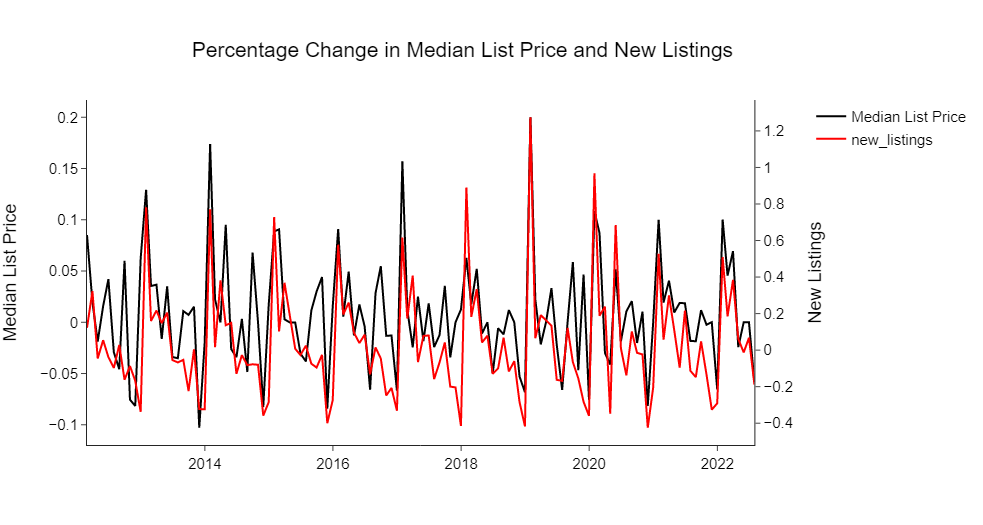